# Projet Python 2020 : Un GPS personnalisé pour les cyclistes
**Projet Python - 2A ENSAE** 

Fares Imane, Desbois Vinciane, Gajdos Romane 

## Introduction : 

__Nos objectifs__ : Nous sommes parties des bases de données disponibles sur data.gouv et qui nous semblaient intéressantes d'un point de vue visualisation, manipulation et modélisation sur le thème des vélos. Initialement, nous voulions travailler sur l'intermodalité des moyens de transports verts. Cependant, les données disponibles ne nous permettaient pas de le faire. Nous avons finalement trouvé des données sur les aménagements cyclables en Ile-de-France et avons eu l'idée de faire un GPS pour vélo.


__Le projet__ : Nous avons dans un premier temps réalisé un travail de visualisation des données que nous allions utiliser pour le GPS : les aménagements cyclables, les stations de vélo en libre service et les accidents de vélo. Vinciane a ensuite découvert la bibliothèque Folium qui a grandement orienté notre travail. Nous avons laissé de côté la base aménagements cyclables pour utiliser les données OpenStreetMap via Folium. Les cartes obtenues correspondent davantage à un GPS : elles sont interactives et affichent la totalité des routes. Nous avons construit le GPS avec comme principale option, le fait que l'utilisateur peut indiquer s'il a son propre vélo ou s'il souhaite en emprunter un en libre service. Nous avons ensuite ajouté des options à notre GPS, notamment un module de prévention concernant les accidents de vélo, un indicateur de congestion et un module indiquant la météo en temps réel.


__Les limites__ : Nous avons envisagé plusieurs pistes, et essayé d'implémenter de manière plus ou moins poussée chacune d’elles, sans pour autant aboutir, pour diverses raisons : nous les détaillons à la fin de ce notebook. De plus, Folium nous est finalement apparu assez limité dans les options de personnalisation proposées : couleurs, formes, opacité,... Les cartes sont beaucoup plus personnalisables avec matplotlib. Peut-être que ce constat est lié au fait que nous n’avons pas utilisé les options les plus intéressantes du package de Folium (notamment Colorpleth) mais seulement des options marginales. 

## Les importations : 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium

## I] Visualisation des données

### 1) Les aménagements cyclables en Ile-de-France

On représente les différents type d'aménagements cyclables en Ile-de-France, groupés en 7 catégories : bande cyclable, piste cyclable, trottoir, voie propre, voie verte, double sens cyclable non marqué. 

Que voulez-vous afficher ? 
bande, piste, trottoir, voie bus, voie propre, voie verte, double sens cyclable non marqué, toutdouble sens cyclable non marqué, piste


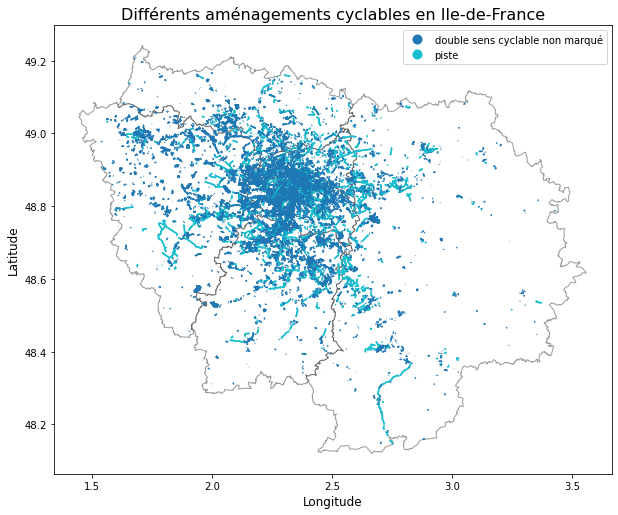

In [16]:
#Attention, pour valider votre input, il faut appuyer sur la touche "Entrée" et non sur "Exécuter"
%run "./Visualisation_pistes.ipynb"

### 2) Les vélos en libre-service

On représente les stations de vélos en libre-service présents en Ile-de-France, en différenciant les vélibs, les véligos et les vélos2.

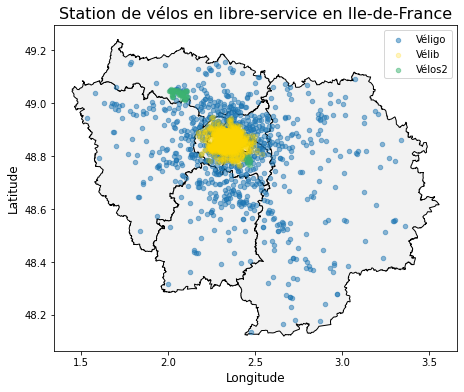

In [4]:
%run "./Visualisation_velos.ipynb"

## II] Personnalisation du GPS

### 1) Un GPS qui prend en compte les accidents 

La rapidité du trajet à effectuer n'est pas la seule chose qui préocuppe les cyclistes. En effet, la qualité du trajet est elle aussi essentielle. 
Nous avons tenté de mesurer cette qualité  en se penchant sur les lieux accidentogènes pour les cyclistes, pour les prévenir du danger. Pour cela, nous avons exploité une base de données localisant les accidents répertoriés par la police en Ile-de-France. 
Pour être plus précis sur les lieux dangereux, nous avons effectué des clusters. Un lieu est considéré comme dangereux si au moins 3 accidents ont eu lieu à moins de 50m les uns des autres. 

Il y a 83 clusters.


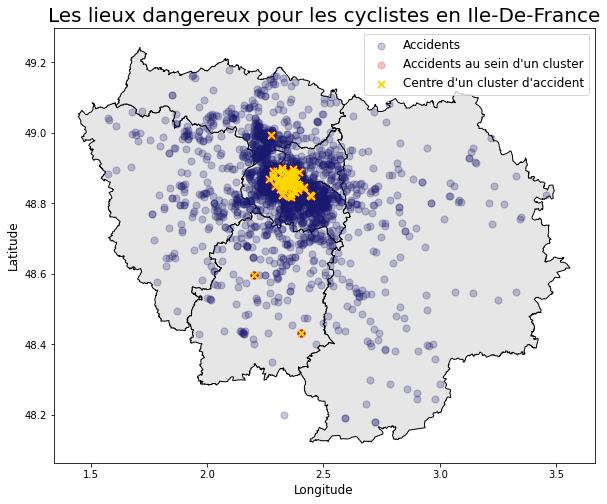

In [5]:
%run "./velo_paris.ipynb"

In [6]:
#Cette carte, réalisée grâce à folium, indique la localisation des accidents dans toute l'Ile-de-France en fonction de la gravité de l'accident
map_accident 

### 2) Un GPS qui informe sur les conditions météréologiques 

Pour que le cycliste soit informé du plus d'éléments possibles, nous lui indiquons ici l'heure à laquelle il fait sa requête, ainsi que les conditions atmosphériques en temps réel en Ile-de-France. Ainsi, le cycliste peut adapter sa conduite à des élements extérieurs, comme les précipitations ou le verglas. 

Aujourd'hui nous sommes le 15-12-2020
Il est 21:29 attention, vous roulez de nuit.
Quel chanceux, il n'y a ni pluie ni verglas pour votre trajet à vélo et la température est de 10.2 degrès.
Pourtant, il faut quand même faire attention, car de nombreux accidents ont lieu dans des conditions atmosphériques normales.
Pour vous en convaincre, regardez ce graphique présentant le nombre d'accidents impliquant des cyclistes ayant eu lieu entre 2005 et 2018 en Ile-de-France.


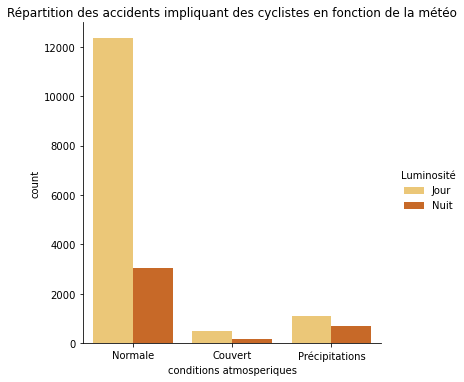

In [7]:
%run "./prolongement_meteo.ipynb"

### 3)  Un GPS qui prend en compte les affluences

Un autre élément qui pourrait intéresser le cycliste est l'état de fréquentation/congestion des pistes au moment où il s'apprête à faire son trajet. Pour estimer la congestion, on ignore les variations saisonnières (mois) et hebdomadaires. On ne considère que les variations en fonction des jours de la semaine : un rapide plot montre deux groupes très distincts de moyennes horaire : les jours de la semaine et les jours du week-end. On crée un indice de congestion des pistes cyclables en fonction du jour et de l'heure de la requêtes. L'indice calculé correspond à la moyenne sur 2019 et 2020 des comptages de chaque compteur au jour de la semaine et à l'heure de la requête. 

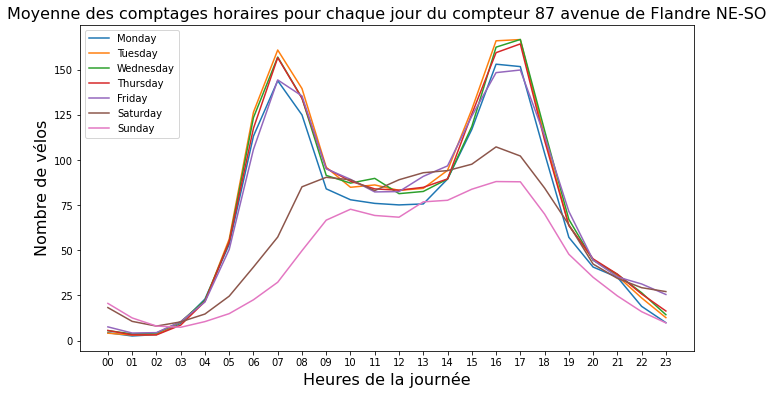

In [8]:
%run "./compteurs.ipynb"

In [9]:
idf

## III] Utilisation du GPS

Dans cette partie, l'utilisateur saisit son point de départ, sa destination et indique s'il a son propre vélo ou s'il souhaite empreinter un vélo en libre-service. 

Dans les deux cas, on affiche son trajet grâce à Folium, en lui indiquant par prévention les lieux accidentogènes pour les cyclistes ainsi que les indices de congestion se trouvant à moins de 50 mètres des pistes qu'il devra emprunter. On lui indique aussi, dans les deux cas, la distance qu'il doit parcourir ainsi que la durée totale estimée de son trajet. 

Cependant, si l'utilisateur n'a pas son propre vélo, alors on sépare son trajet total en 3 étapes :
- Un trajet à pied de son point de départ à la station de vélo en libre-service la plus proche. Lorsqu'on dispose de cette information, on vérifie qu'il y a bien un vélo disponible à cette station. Si ce n'est le cas, on lui indique une autre station proche de son point de départ et avec au moins un vélo disponible. 
- Un trajet en vélo de cette station à la station la plus proche de sa destination. On vérifie si un dock/support à vélo est disponible à cette station pour qu'il puisse y laisser son vélo à la fin de son trajet. 
- Un trajet à pied de la station la plus proche de sa destination jusqu'à sa destination finale. 

Pour chacune de ces étapes, on lui indique la distance qu'il doit parcourir (à pied ou à vélo) ainsi que le temps approximatif que cela lui prendra. 

Il y a lieu de noter que certaines zones de l'Ile-de-France ne sont pas bien désservies en vélos libre-service. C'est pour cette raison qu'on vérifie, pour chaque trajet que l'utilisateur souhaite faire, que prendre la peine de se déplacer jusqu'aux stations de vélo n'est pas plus long que faire le trajet complet à pied. Lorsque c'est le cas, on suggère à l'utilisateur de faire le trajet à pied.

In [10]:
#Attention, pour valider votre input, il faut appuyer sur la touche "Entrée" et non sur "Exécuter"
%run "./GPS.ipynb"

D'où partez-vous ? (numéro, rue, code postal ville)57, avenue du Plessis, 92350
Où voulez-vous aller ? (numéro, rue, code postal ville)5, avenue Maurice d'Octagne, 75014
Avez-vous votre propre vélo ? Entrez 'oui' ou 'non' oui

 
Distance à effectuer en vélo : 5.48 km
soit un temps de trajet d'environ : 22 minutes



Cette carte, réalisée grâce à folium, indique le trajet de l'utilisateur, la localisation des lieux accidentogènes pour les cyclistes ainsi que les indices de congestion se trouvant à moins de 50 mètres des pistes qu'il devra emprunter.

In [11]:
idf

### Signalement de la part de l'utilisateur après le trajet

Après avoir effectué son trajet, l'utilisateur a la possibilité de signaler quelque chose (accident, piste fermée, ...).  On lui demande alors d'indiquer ce qu'il souhaite signaler ainsi que de placer un marqueur à l'endroit correspondant.

In [13]:
a=input("Suite à votre trajet, souhaitez-vous signaler quelque chose ? Entrez 'oui' ou 'non'")

if(a=='oui'):
    x=input("Que souhaitez-vous signaler ?")
    print("Cliquez à l'endroit correspondant sur la carte")
    
print("Merci de contribuer à l'amélioration notre application!")

idf.add_child(folium.ClickForMarker(popup=x))

Suite à votre trajet, souhaitez-vous signaler quelque chose ? Entrez 'oui' ou 'non'chaussée déformée
Merci de contribuer à l'amélioration notre application!


## IV] Pistes non abouties


1) Notre piste initiale portait sur le __covoiturage__ mais il n'y avait aucune donnée disponible sur les flux, les seules données disponibles étaient les aires de covoiturage et leur capacité.


2) Pour ce qui est des compteurs : nous aurions pu faire une __prédiction de la congestion avec sklearn__ plutôt qu'une simple utilisation des moyennes sur les années passées, mais cela semblait compliqué. De plus, les seules données disponibles étaient celles de 2019 et 2020, et celles de 2020 semblaient être biaisées par la situation liée au Covid. 


3) Nous souhaitions mener en parallèle du GPS une analyse de la __corrélation entre les conditions atmosphériques et le nombre d'accidents__. 
    Pour pouvoir étudier ce lien, nous avions : les accidents répertoriés entre 2005 et 2018 en Ile-de-France en fonction des conditions météorologiques et la fréquentation des vélos dans Paris mesurée par les compteurs. 
    En regardant les données, nous avons remarqué qu’entre 2005 et 2018 il y a eu plus d’accidents dans des conditions normales. Cependant, nous ne pouvions pas affirmer que ces conditions étaient plus dangereuses, car il y avait un grand biais dans cette affirmation. En effet, il y a beaucoup plus de cyclistes lorsque la météo est agréable, d’où un nombre plus élevé d’accidents. 
    Pour contrer ce biais, nous voulions obtenir la moyenne du nombre de cyclistes les jours avec et sans précipitations, pour mesurer la baisse du nombre de cyclistes liée aux précipitations. Pour cela, nous pensions d’abord trouver une base de données avec la météo 2019/2020 et la mettre en relation avec les données de comptage de vélo à Paris, mais nous avons dû abandonner cette idée, car les données étaient toutes payantes. 
    Ensuite, nous pensions joindre les jours répertoriés dans la base accidents et les données de comptage pour essayer de faire une moyenne en fonction des précipitations. Cependant, cette jointure était impossible car les données sur les accidents s’arrêtent en 2018, tandis que celles des compteurs ne sont téléchargeables que pour les 13 derniers mois. Nous avons donc dû abandonner cette idée de “quantifier le pourcentage de chance de plus d’avoir un accident selon les facteurs météréologiques”.


4) Nous avions l'idée de __modifier de la fonction Router de folium ou de créer une nouvelle fonction pour créer un GPS vélo qui ne cherche pas le trajet le plus rapide mais le plus agréable__ (en mettant plus de poids sur les voies vertes, les zones sans accidents,... par ex), sous réserve d'une perte raisonnable de temps. Mais après plusieurs tests, la fonction Router semblait faire un bon compromis entre rapidité et confort du trajet (réelle différence du trajet par rapport à un trajet requêté avec l'option "car"). De plus, modifier une fonction déjà existante semblait plus compliqué que prévu, malgré des conseils avisés,...

5) Nous avons conscience que __le temps de trajet n'est pas parfaitement fiable__ (nous avons pris une moyenne horaire du nombre de km). Pour ameliorer cette estimation il faudrait prendre en compte des éléments que nous avons (ex: on roule plus vite sur une piste cyclable que sur la route) et des éléments que nous n'avons pas encore (la topographie des lieux, la disposition des feux rouges etc). Cette piste pourrait nettement augmenter la précision du resultat.
